# **Activity Lab Week 4: Data Transformation**
**Tommaso & Costanza**

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Check if there are highly correlated features and drop them if there are any.

In [3]:
df = pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")

<AxesSubplot:>

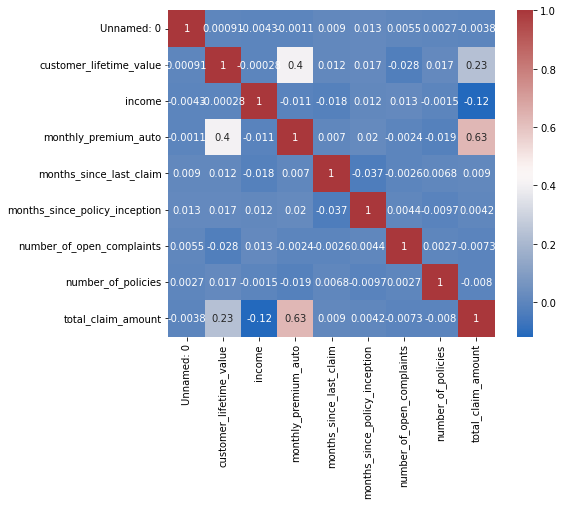

In [6]:
fig = plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap='vlag', square=True, annot=True)

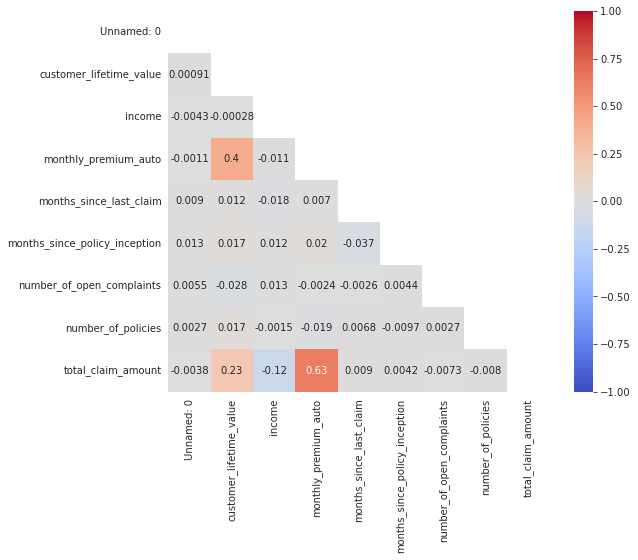

In [104]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [7]:
#One Hot/Label Encoding of the categorical variables in the categoricals data frame 
#that you created in Activity 4. 
#(Hint: check Dropfirst option)

In [8]:
df=pd.get_dummies(df, drop_first=True)
df.head(5)

,Unnamed: 0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,region_east,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,0,4809,48029,61,7,52,0,9,292,0,...,0,0,0,0,0,0,0,0,1,0
1,1,2228,26794,64,3,26,0,1,744,0,...,0,1,0,0,0,0,0,0,1,0
2,2,14947,22139,100,34,31,0,2,480,1,...,0,1,0,0,0,0,1,0,1,0
3,3,22332,49078,97,10,3,0,2,484,0,...,1,0,0,0,0,0,0,0,1,0
4,4,9025,23675,117,15,31,1,7,707,0,...,1,0,0,0,0,0,0,0,1,0


In [9]:
#for the first iteration, we will focus on the  numericals data (numericals data frame) as our data source.

In [10]:
df_num = df.iloc[:,1:].select_dtypes(np.number)
df_cat = df.select_dtypes(object)
df_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,region_east,region_north west,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,4809,48029,61,7,52,0,9,292,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2228,26794,64,3,26,0,1,744,0,0,...,0,1,0,0,0,0,0,0,1,0
2,14947,22139,100,34,31,0,2,480,1,0,...,0,1,0,0,0,0,1,0,1,0
3,22332,49078,97,10,3,0,2,484,0,1,...,1,0,0,0,0,0,0,0,1,0
4,9025,23675,117,15,31,1,7,707,0,1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,15563,64811,253,8,40,2,7,1214,0,0,...,0,0,1,1,0,0,0,0,1,0
10685,5259,61146,65,7,68,0,6,273,0,1,...,1,0,0,0,0,0,0,0,1,0
10686,23893,39837,201,11,63,0,2,381,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,11971,64195,158,0,27,4,6,618,0,0,...,1,0,0,0,0,0,1,0,1,0


In [11]:
#(optional)  remove the outliers from the numerical columns.

In [12]:
pd.cut(df_num['total_claim_amount'],10)

0          (289.3, 578.6]
1          (578.6, 867.9]
2          (289.3, 578.6]
3          (289.3, 578.6]
4          (578.6, 867.9]
               ...       
10684    (1157.2, 1446.5]
10685     (-2.893, 289.3]
10686      (289.3, 578.6]
10687      (578.6, 867.9]
10688     (867.9, 1157.2]
Name: total_claim_amount, Length: 10689, dtype: category
Categories (10, interval[float64, right]): [(-2.893, 289.3] < (289.3, 578.6] < (578.6, 867.9] < (867.9, 1157.2] ... (1735.8, 2025.1] < (2025.1, 2314.4] < (2314.4, 2603.7] < (2603.7, 2893.0]]

In [13]:
df_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,region_east,region_north west,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,4809,48029,61,7,52,0,9,292,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2228,26794,64,3,26,0,1,744,0,0,...,0,1,0,0,0,0,0,0,1,0
2,14947,22139,100,34,31,0,2,480,1,0,...,0,1,0,0,0,0,1,0,1,0
3,22332,49078,97,10,3,0,2,484,0,1,...,1,0,0,0,0,0,0,0,1,0
4,9025,23675,117,15,31,1,7,707,0,1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,15563,64811,253,8,40,2,7,1214,0,0,...,0,0,1,1,0,0,0,0,1,0
10685,5259,61146,65,7,68,0,6,273,0,1,...,1,0,0,0,0,0,0,0,1,0
10686,23893,39837,201,11,63,0,2,381,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,11971,64195,158,0,27,4,6,618,0,0,...,1,0,0,0,0,0,1,0,1,0


In [14]:
df_num['total_claim_amount']
removed_outliers = df_num['total_claim_amount'].between(df_num['total_claim_amount'].quantile(.05), df_num['total_claim_amount'].quantile(.95))
removed_outliers

0         True
1         True
2         True
3         True
4         True
         ...  
10684    False
10685     True
10686     True
10687     True
10688    False
Name: total_claim_amount, Length: 10689, dtype: bool

In [15]:
df_num=df_num.loc[removed_outliers]

In [16]:
df_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,region_east,region_north west,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,4809,48029,61,7,52,0,9,292,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2228,26794,64,3,26,0,1,744,0,0,...,0,1,0,0,0,0,0,0,1,0
2,14947,22139,100,34,31,0,2,480,1,0,...,0,1,0,0,0,0,1,0,1,0
3,22332,49078,97,10,3,0,2,484,0,1,...,1,0,0,0,0,0,0,0,1,0
4,9025,23675,117,15,31,1,7,707,0,1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10682,2771,59855,74,30,82,4,1,355,0,0,...,1,0,0,0,0,0,0,1,1,0
10683,19228,56544,187,14,32,0,2,897,0,0,...,1,0,0,0,1,0,0,0,1,0
10685,5259,61146,65,7,68,0,6,273,0,1,...,1,0,0,0,0,0,0,0,1,0
10686,23893,39837,201,11,63,0,2,381,0,0,...,0,0,1,0,1,0,0,0,1,0


In [17]:
#X-y split (y is the target variable which  is the total claim amount)
x=df_num.drop('total_claim_amount', axis=1)
y=df_num.total_claim_amount
x

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,region_east,region_north west,region_west region,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,4809,48029,61,7,52,0,9,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2228,26794,64,3,26,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,14947,22139,100,34,31,0,2,1,0,0,...,0,1,0,0,0,0,1,0,1,0
3,22332,49078,97,10,3,0,2,0,1,0,...,1,0,0,0,0,0,0,0,1,0
4,9025,23675,117,15,31,1,7,0,1,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10682,2771,59855,74,30,82,4,1,0,0,0,...,1,0,0,0,0,0,0,1,1,0
10683,19228,56544,187,14,32,0,2,0,0,0,...,1,0,0,0,1,0,0,0,1,0
10685,5259,61146,65,7,68,0,6,0,1,0,...,1,0,0,0,0,0,0,0,1,0
10686,23893,39837,201,11,63,0,2,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [18]:
y

0        292
1        744
2        480
3        484
4        707
        ... 
10682    355
10683    897
10685    273
10686    381
10687    618
Name: total_claim_amount, Length: 9624, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff39805d640>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff39805dca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff39805d370>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff3980731c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff398073490>],
 'means': []}

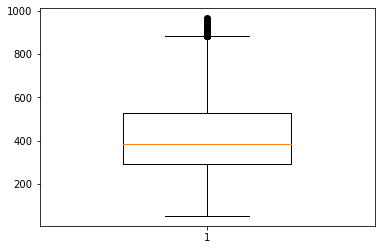

In [19]:
plt.boxplot(df_num['total_claim_amount'], widths=.5)